In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

In [4]:
# function for a dict[KO] -> [pathway, subcategory]

def create_pathway_dict(KO_file):
    data = pd.read_csv(KO_file, on_bad_lines='skip', sep = "\t")
    data.columns = ["KOcategory", "subcategory", "Pathway", "KOterm", "Function", "Description"]
    KO_pathway_dict = {}
    for i in range(len(data["KOterm"])):
        KO_pathway_dict[data["KOterm"][i]] = [data["KOcategory"][i], data["subcategory"][i]]
    return KO_pathway_dict
    

In [5]:
KOcategory_dict = create_pathway_dict("./br_ko00001.tab.txt")

In [6]:
#print(KOcategory_dict)

In [15]:
# function to check if a gene is unique for given bacteria

def get_unique_gene_names(gene_matrix):
    genematrix = pd.read_csv(gene_matrix)
    list_of_clustered_genes = genematrix["geneNames"]
    all_bacteria = ["p13", "p50071", "p8", "p4", "p3"]
    p13_list_of_absence = list(genematrix[all_bacteria[0]].values)
    p50071_list_of_absence = list(genematrix[all_bacteria[1]].values)
    p8_list_of_absence = list(genematrix[all_bacteria[2]].values)
    p4_list_of_absence = list(genematrix[all_bacteria[3]].values)
    p3_list_of_absence = list(genematrix[all_bacteria[4]].values)
    
    unique_genes_dict = {}
    
    for i in range(len(p13_list_of_absence)):
        if p13_list_of_absence[i] == 1 and p50071_list_of_absence[i] == 0 and p8_list_of_absence[i] == 0 and p4_list_of_absence[i] == 0 and p3_list_of_absence[i] == 0:
            if 'p13' in unique_genes_dict.keys():
                unique_genes_dict['p13'].append(list_of_clustered_genes[i])
            else:
                unique_genes_dict['p13'] = [list_of_clustered_genes[i]]
        if p13_list_of_absence[i] == 0 and p50071_list_of_absence[i] == 1 and p8_list_of_absence[i] == 0 and p4_list_of_absence[i] == 0 and p3_list_of_absence[i] == 0:
            if 'p50071' in unique_genes_dict.keys():
                unique_genes_dict['p50071'].append(list_of_clustered_genes[i])
            else:
                unique_genes_dict['p50071'] = [list_of_clustered_genes[i]]
        if p13_list_of_absence[i] == 0 and p50071_list_of_absence[i] == 0 and p8_list_of_absence[i] == 1 and p4_list_of_absence[i] == 0 and p3_list_of_absence[i] == 0:
            if 'p8' in unique_genes_dict.keys():
                unique_genes_dict['p8'].append(list_of_clustered_genes[i])
            else:
                unique_genes_dict['p8'] = [list_of_clustered_genes[i]]
        if p13_list_of_absence[i] == 0 and p50071_list_of_absence[i] == 0 and p8_list_of_absence[i] == 0 and p4_list_of_absence[i] == 1 and p3_list_of_absence[i] == 0:
            if 'p4' in unique_genes_dict.keys():
                unique_genes_dict['p4'].append(list_of_clustered_genes[i])
            else:
                unique_genes_dict['p4'] = [list_of_clustered_genes[i]]
        if p13_list_of_absence[i] == 0 and p50071_list_of_absence[i] == 0 and p8_list_of_absence[i] == 0 and p4_list_of_absence[i] == 0 and p3_list_of_absence[i] == 1:
            if 'p3' in unique_genes_dict.keys():
                unique_genes_dict['p3'].append(list_of_clustered_genes[i])
            else:
                unique_genes_dict['p3'] = [list_of_clustered_genes[i]]
            
    return unique_genes_dict
            
            
            
            


In [16]:
get_unique_gene_names("/Users/jakub/Desktop/internship_helmholtz/P3/final_data2/raw/30_70_genematrices/bactgenematrix30id.csv")

{'p13': ['gene_1|GeneMark.hmm|53_aa|+|1|162',
  'gene_3|GeneMark.hmm|191_aa|-|696|1271',
  'gene_7|GeneMark.hmm|309_aa|-|5326|6255',
  'gene_15|GeneMark.hmm|213_aa|+|13557|14198',
  'gene_29|GeneMark.hmm|690_aa|+|27515|29587',
  'gene_31|GeneMark.hmm|885_aa|+|30300|32957',
  'gene_116|GeneMark.hmm|67_aa|+|112347|112550',
  'gene_127|GeneMark.hmm|232_aa|+|121338|122036',
  'gene_131|GeneMark.hmm|243_aa|+|125633|126364',
  'gene_134|GeneMark.hmm|33_aa|-|128231|128332',
  'gene_144|GeneMark.hmm|162_aa|-|137614|138102',
  'gene_153|GeneMark.hmm|165_aa|+|143538|144035',
  'gene_164|GeneMark.hmm|532_aa|+|156760|158358',
  'gene_180|GeneMark.hmm|908_aa|-|172961|175687',
  'gene_196|GeneMark.hmm|399_aa|+|192984|194183',
  'gene_197|GeneMark.hmm|146_aa|+|194355|194795',
  'gene_202|GeneMark.hmm|608_aa|-|198560|200386',
  'gene_234|GeneMark.hmm|356_aa|-|237845|238915',
  'gene_253|GeneMark.hmm|754_aa|+|255331|257595',
  'gene_255|GeneMark.hmm|389_aa|-|258360|259529',
  'gene_264|GeneMark.hmm|307

In [36]:
# for each bacteria get the info of what pathways [version:unique genes]

def get_pathway_for_bacteria(bacteria_kegg_results_file, KOcategory_dict_, gene_matrix, bacteria_name):
    list_genename_KO = []
    unique_genes_dict = get_unique_gene_names(gene_matrix)
    with open(bacteria_kegg_results_file, "r") as keggfile:
        for line in keggfile.readlines()[2:]:
            gene_name = line.split()[1]
            KO = line.split()[2]
            if gene_name in unique_genes_dict[bacteria_name]:
                list_genename_KO.append((gene_name, KO))
    KO_distr_dict = {}
    for i in range(len(list_genename_KO)):
        KO = list_genename_KO[i][1]
        if KO in KOcategory_dict_.keys():
            pathway_major = KOcategory_dict_[KO][0]
            pathway_minor = KOcategory_dict_[KO][1]
            if pathway_major == "Brite Hierarchies" or "Not Included in Pathway or Brite" in pathway_major:
                continue
            if pathway_major+":"+pathway_minor in KO_distr_dict.keys():
                KO_distr_dict[pathway_major+":"+pathway_minor] += 1
            else:
                KO_distr_dict[pathway_major+":"+pathway_minor] = 1
    return dict(sorted(KO_distr_dict.items(), key=lambda item: item[0]))
    
    

In [37]:
p13_distr = get_pathway_for_bacteria("./p13kegg.txt", KOcategory_dict, "/Users/jakub/Desktop/internship_helmholtz/P3/final_data2/raw/30_70_genematrices/bactgenematrix30id.csv", "p13")

In [38]:
p50071_distr = get_pathway_for_bacteria("./p50071kegg.txt", KOcategory_dict, "/Users/jakub/Desktop/internship_helmholtz/P3/final_data2/raw/30_70_genematrices/bactgenematrix30id.csv", "p50071")

In [39]:
p8_distr = get_pathway_for_bacteria("./p8kegg.txt", KOcategory_dict, "/Users/jakub/Desktop/internship_helmholtz/P3/final_data2/raw/30_70_genematrices/bactgenematrix30id.csv", "p8")

In [40]:
p4_distr = get_pathway_for_bacteria("./p4kegg.txt", KOcategory_dict, "/Users/jakub/Desktop/internship_helmholtz/P3/final_data2/raw/30_70_genematrices/bactgenematrix30id.csv", "p4")

In [41]:
p3_distr = get_pathway_for_bacteria("./p3kegg.txt", KOcategory_dict, "/Users/jakub/Desktop/internship_helmholtz/P3/final_data2/raw/30_70_genematrices/bactgenematrix30id.csv", "p3")

In [42]:
p13_distr

{'Cellular Processes:Cellular community - prokaryotes': 9,
 'Cellular Processes:Transport and catabolism': 1,
 'Environmental Information Processing:Membrane transport': 1,
 'Environmental Information Processing:Signal transduction': 8,
 'Genetic Information Processing:Translation': 1,
 'Human Diseases:Drug resistance: antimicrobial': 1,
 'Human Diseases:Neurodegenerative disease': 1,
 'Human Diseases:Substance dependence': 1,
 'Metabolism:Amino acid metabolism': 24,
 'Metabolism:Biosynthesis of other secondary metabolites': 6,
 'Metabolism:Carbohydrate metabolism': 12,
 'Metabolism:Energy metabolism': 6,
 'Metabolism:Glycan biosynthesis and metabolism': 3,
 'Metabolism:Lipid metabolism': 5,
 'Metabolism:Metabolism of cofactors and vitamins': 18,
 'Metabolism:Metabolism of other amino acids': 8,
 'Metabolism:Metabolism of terpenoids and polyketides': 1,
 'Metabolism:Nucleotide metabolism': 7,
 'Metabolism:Xenobiotics biodegradation and metabolism': 6,
 'Organismal Systems:Nervous syste

In [98]:
# function to plot histograms

def plot_pathway_distr(bacteria_distr, bacteria_name):
    
    plt.rcParams["figure.dpi"] = 500
    pathway_anns = []
    counts = []
    for the_key in bacteria_distr.keys(): 
        pathway_anns.append(the_key.split(":")[-1].upper())
        counts.append(bacteria_distr[the_key])
    plt.figure(dpi = 2400)
    width = 0.75
    fig, ax = plt.subplots()    
    barlist = ax.barh(pathway_anns, counts, width)
      
    color_dict = {}
    bar_count = 0    
    colors = list(mcolors.TABLEAU_COLORS)
    pathway_major_list = []
    colors_used_list = []
    for key in bacteria_distr.keys():
        pathway_major = key.split(":")[0]
        if pathway_major in color_dict.keys():
            color_dict[pathway_major].append(bar_count)
            bar_count += 1
        else:
            the_color = colors.pop(0)
            color_dict[pathway_major] = [the_color, bar_count]
            bar_count += 1
            pathway_major_list.append(pathway_major)
            colors_used_list.append(the_color)
          
    for value in color_dict.values():
        for i in value[1:]:
            barlist[i].set_color(str(value[0]))
    
    patches_for_legend = []
    for i in range(len(pathway_major_list)):
        patch = mpatches.Patch(color = colors_used_list[i], label = pathway_major_list[i])
        patches_for_legend.append(patch)
    
    for i, v in enumerate(counts):
        ax.text(v + 0.01, i, str(v), color='black', fontsize = 5)
    ind = np.arange(len(pathway_anns))
    ax.set_yticks(ind + width / 2 - 0.35)
    ax.set_yticklabels(pathway_anns, minor = False, fontsize = 4)
    plt.title("KEGG pathway annotation " + bacteria_name)
    plt.xlabel("Number of genes")
    plt.legend()
    plt.xticks(range(0, 3))
    #red_patch = mpatches.Patch(color='red', label='The red data')
    plt.legend(handles = patches_for_legend, loc = "upper right", prop={'size': 5})
    plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 15360x11520 with 0 Axes>

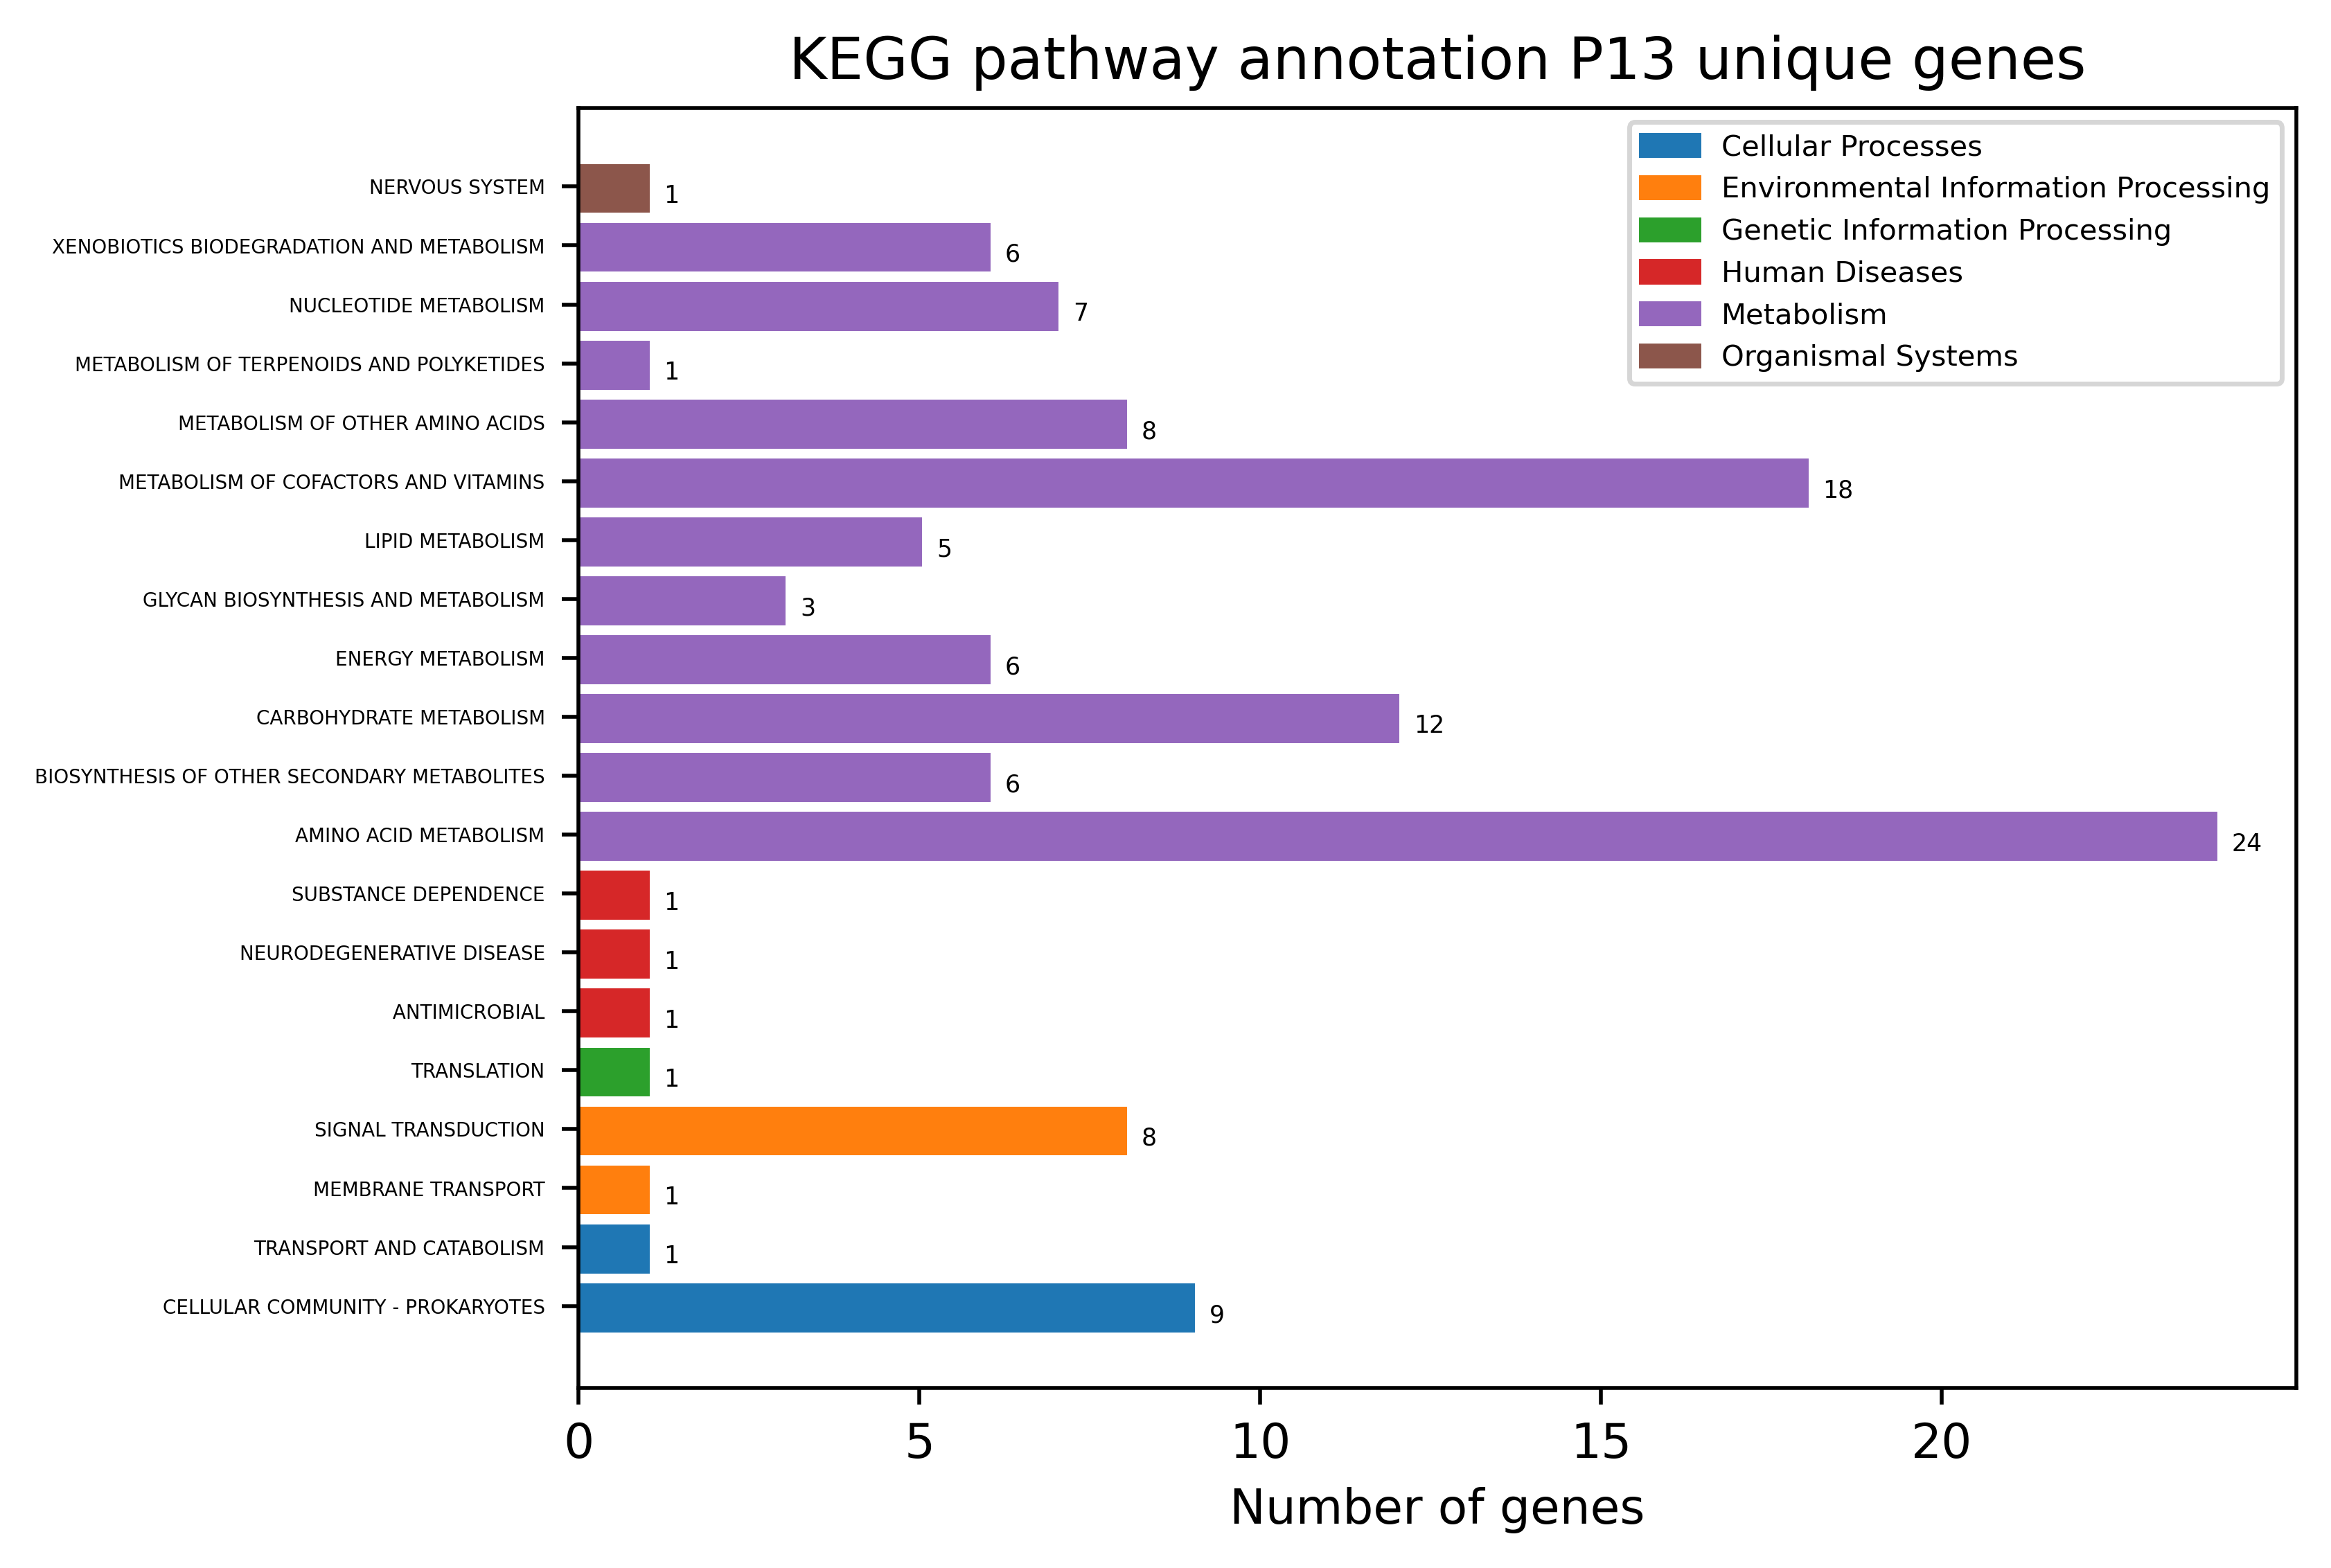

In [63]:
plot_pathway_distr(p13_distr, "P13 unique genes")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 15360x11520 with 0 Axes>

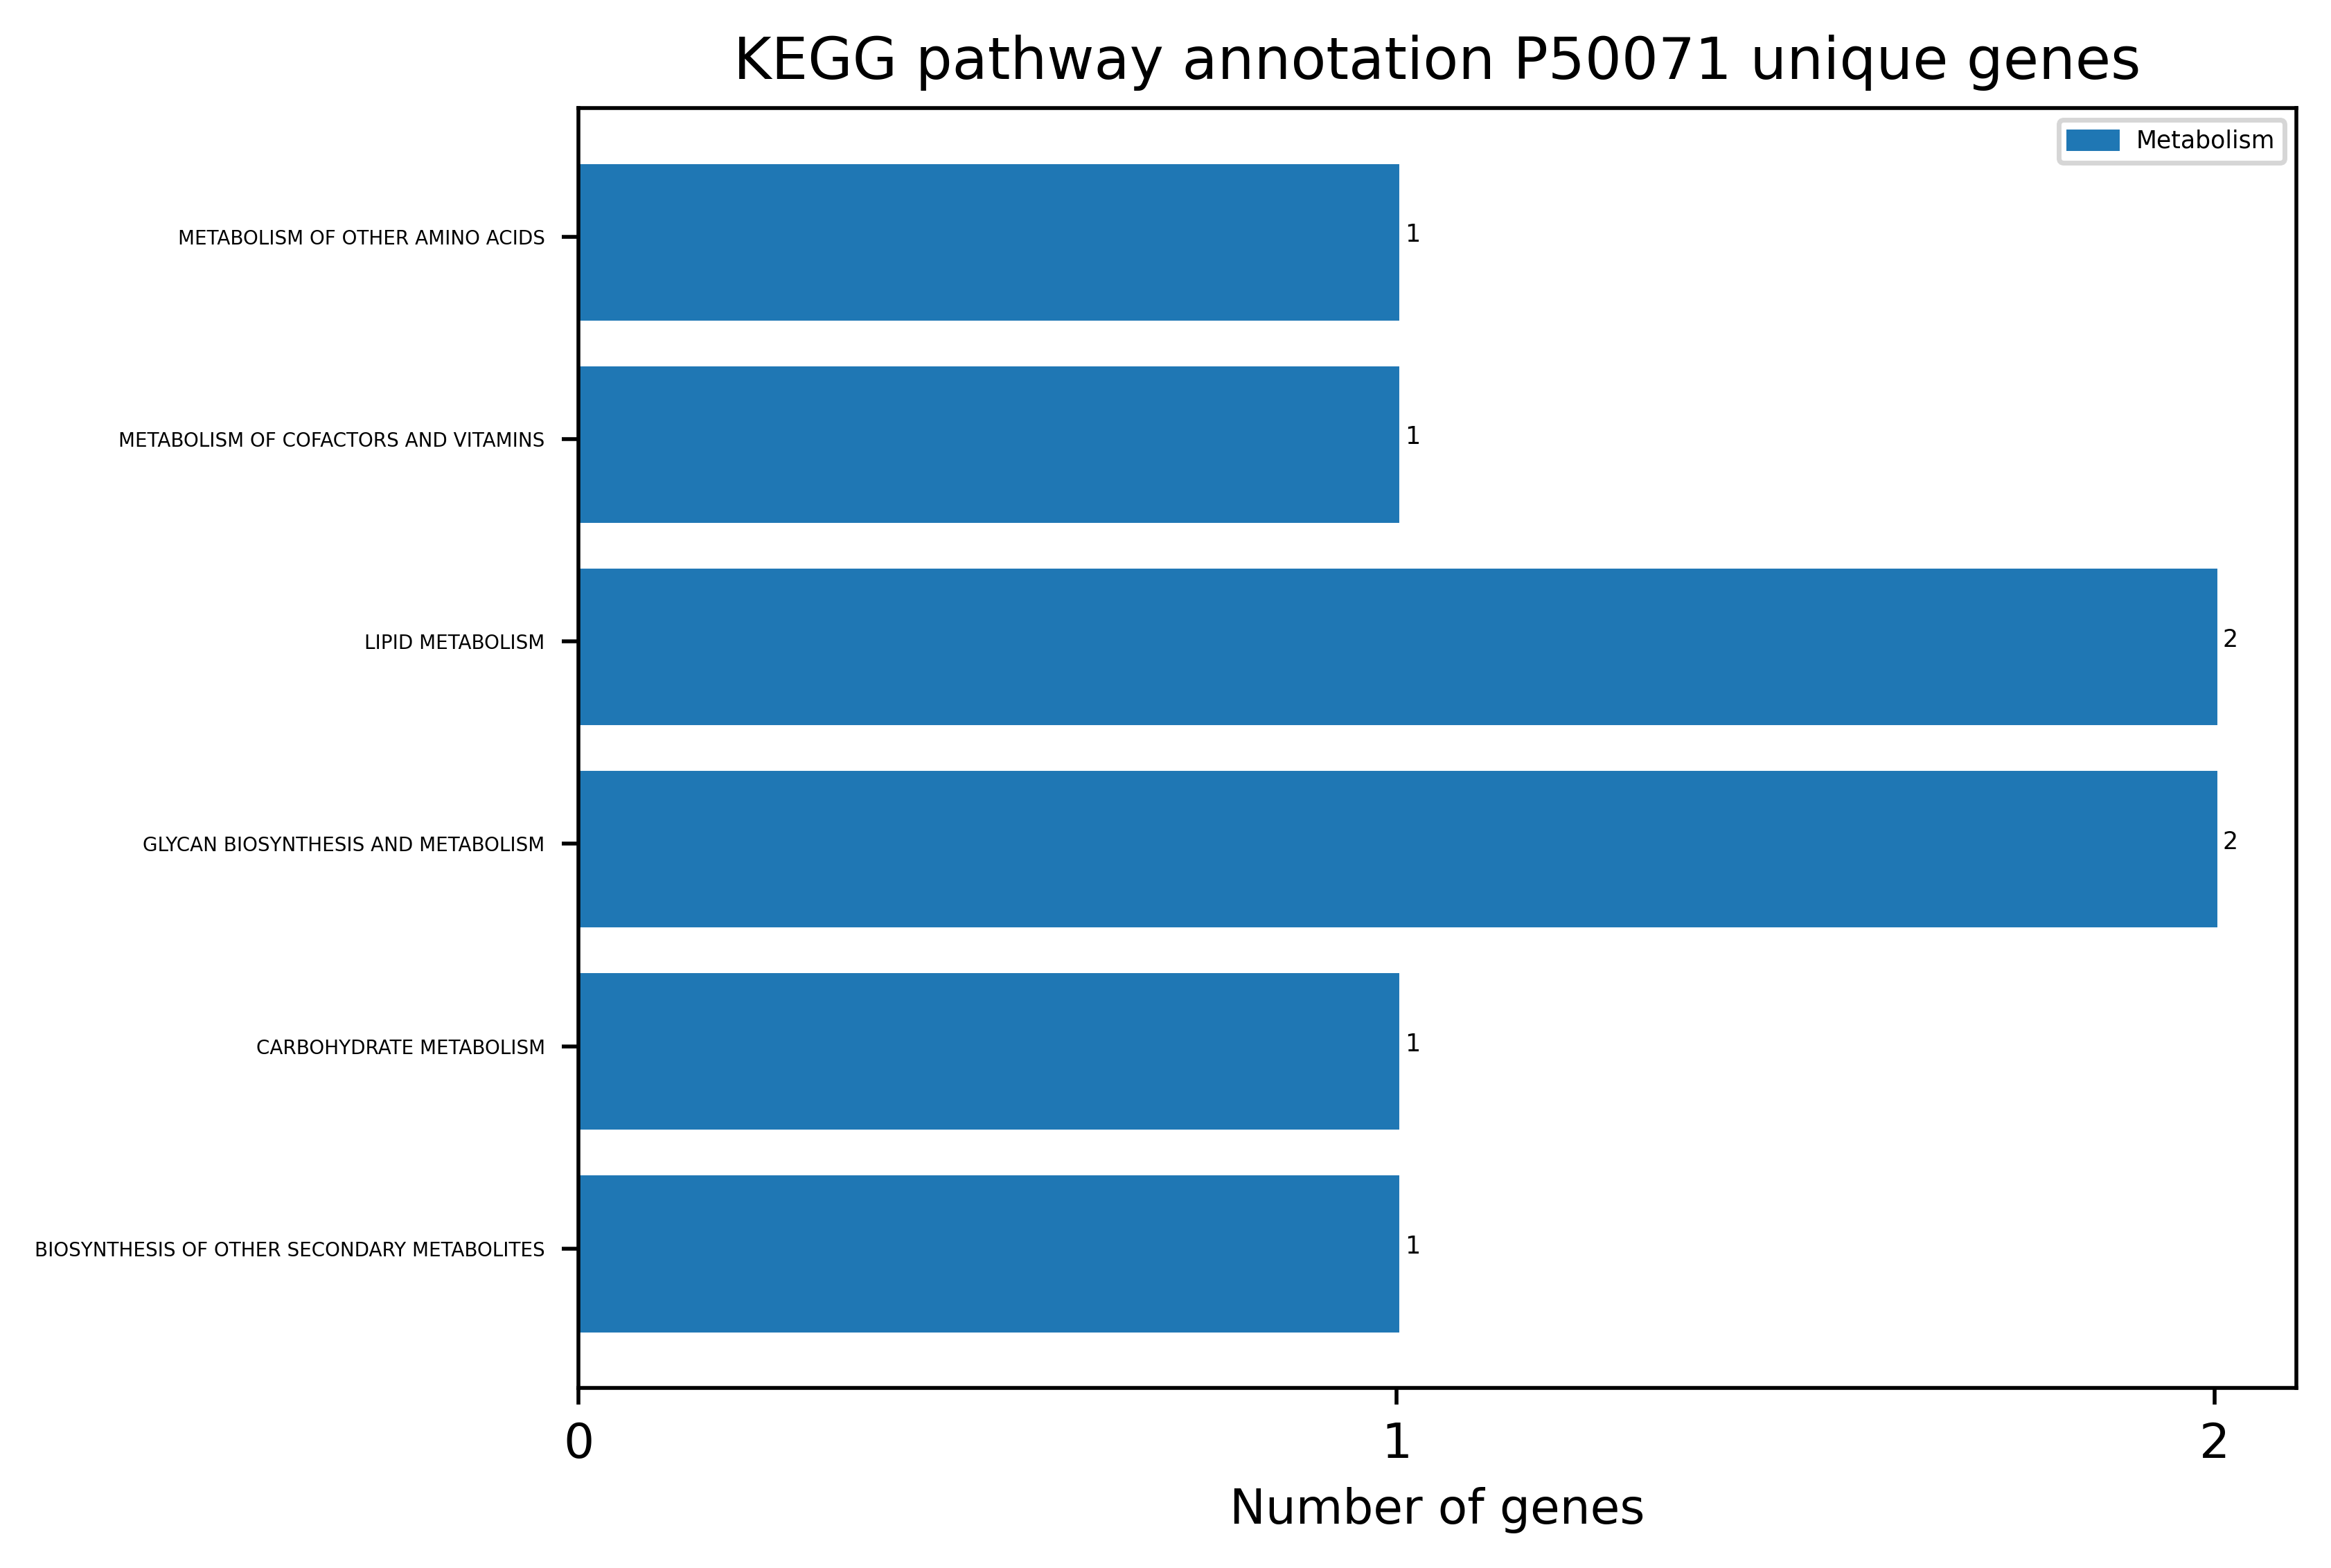

In [99]:
plot_pathway_distr(p50071_distr, "P50071 unique genes")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 15360x11520 with 0 Axes>

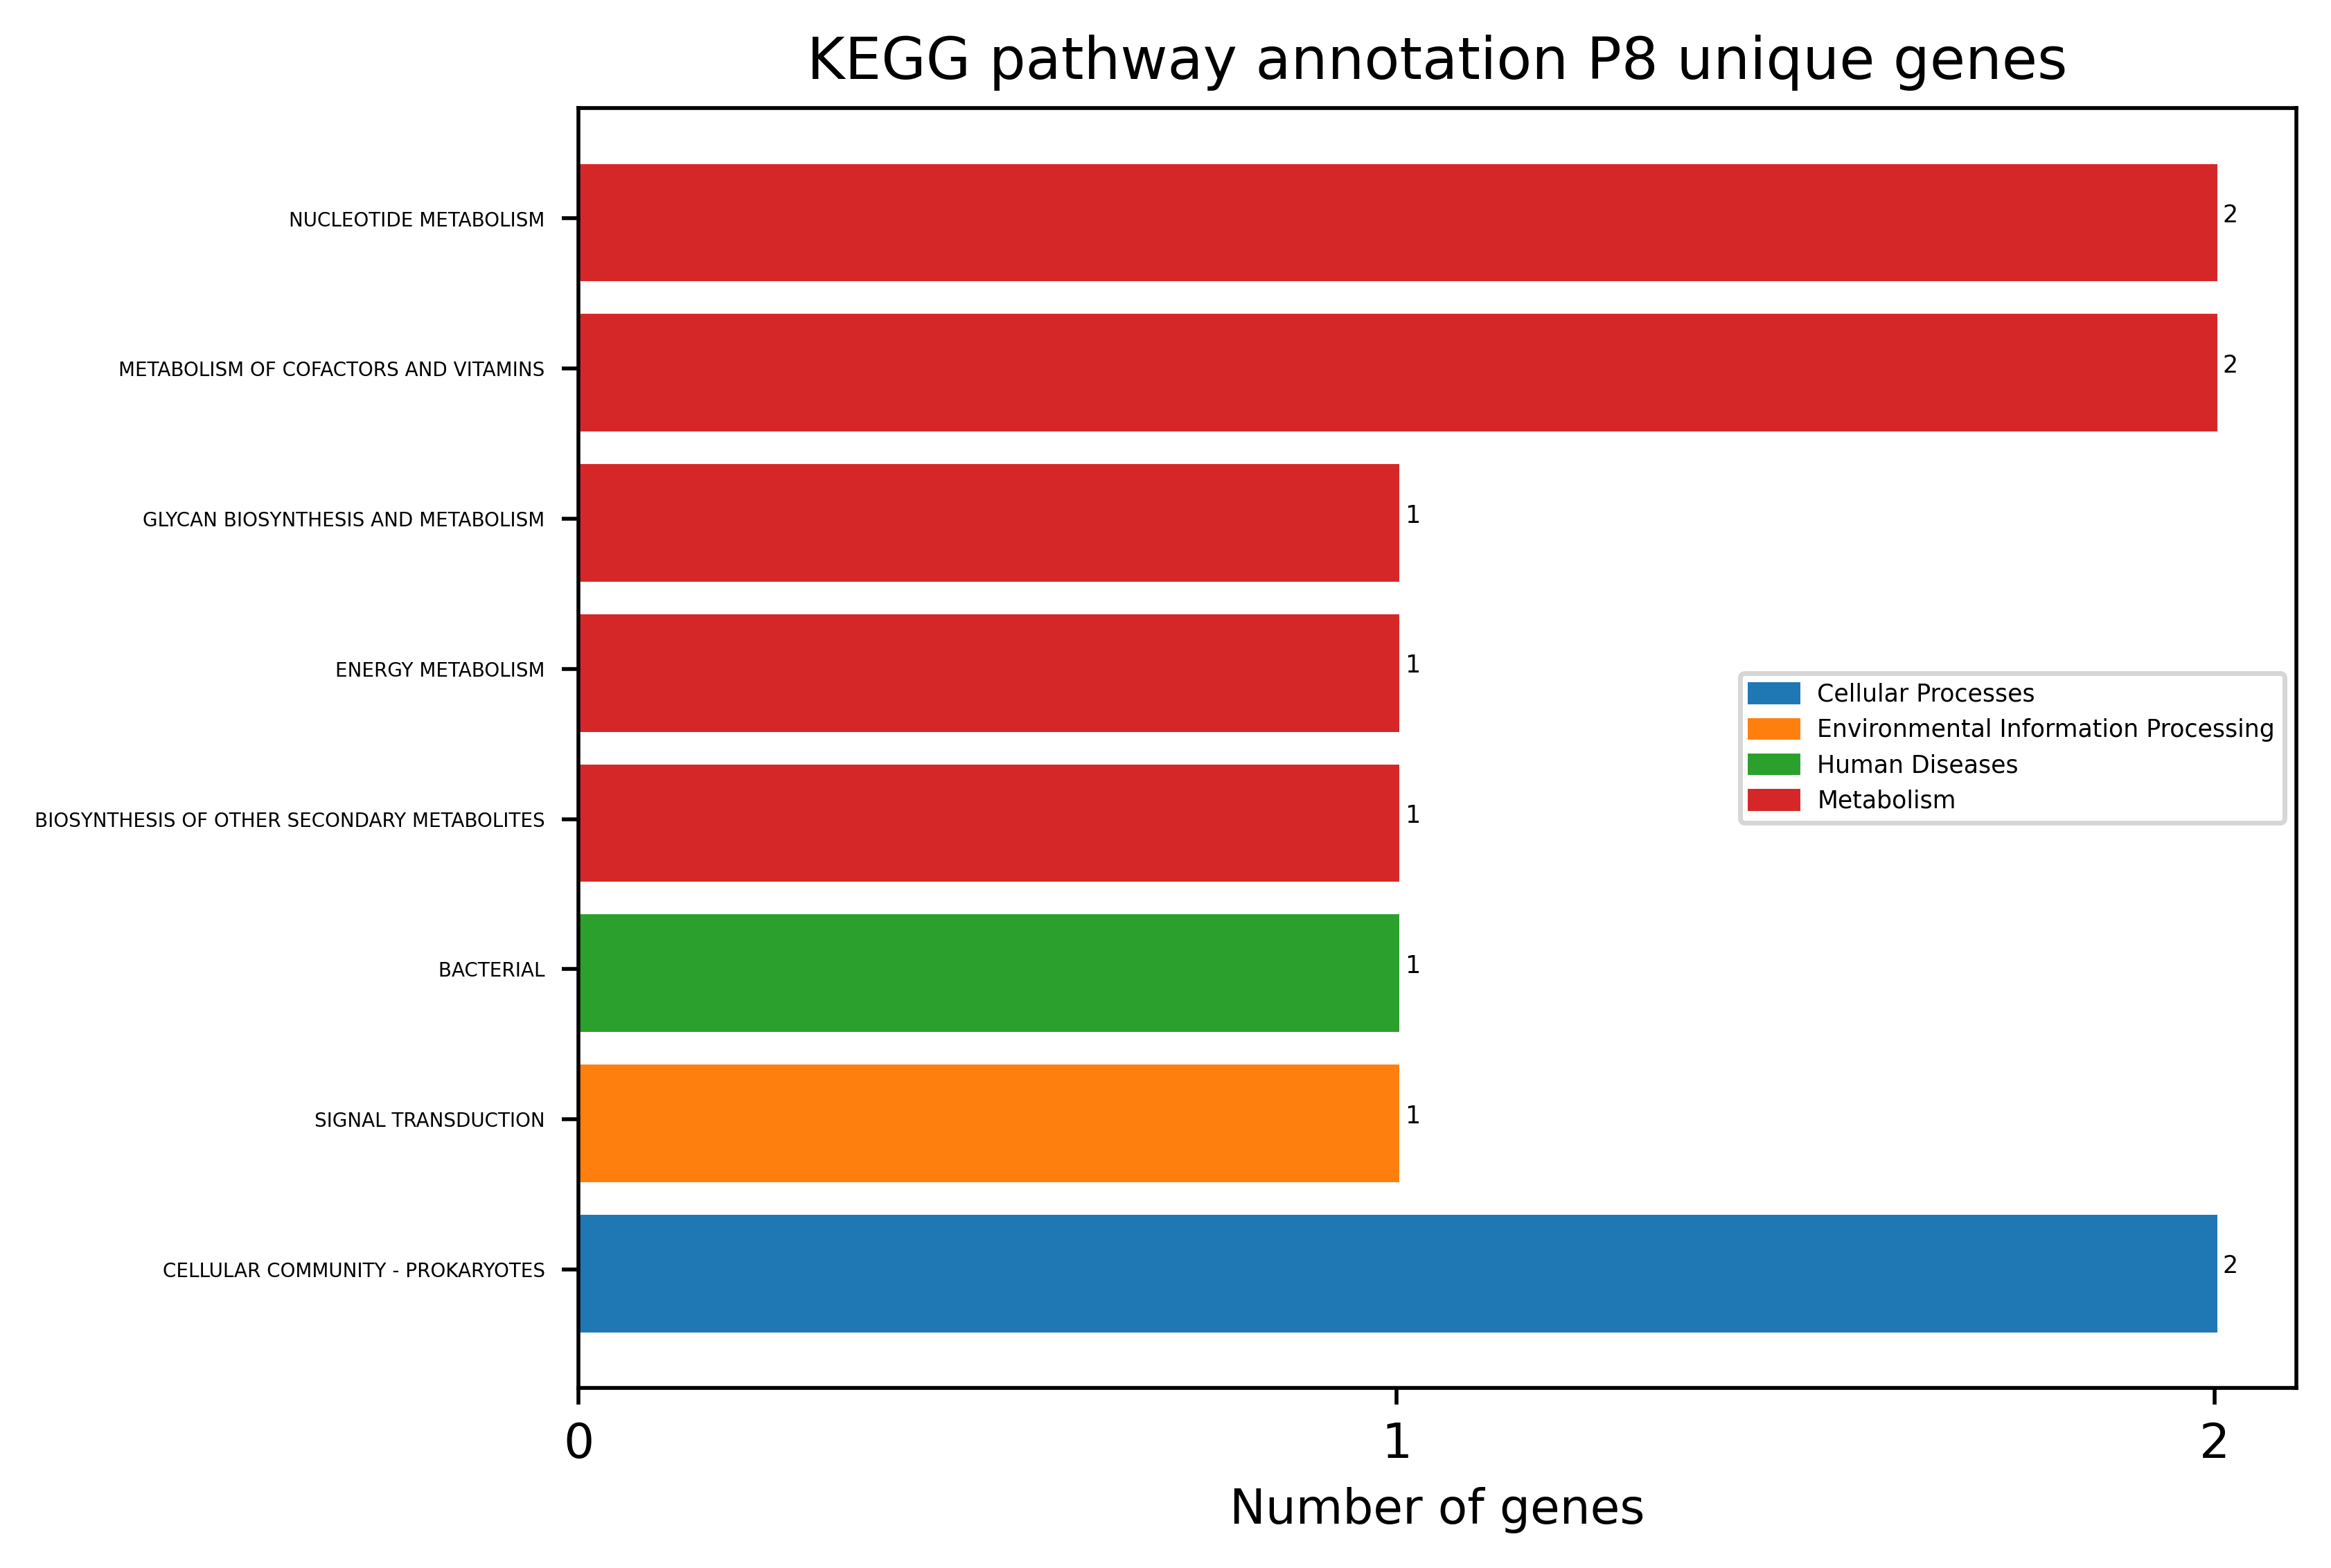

In [97]:
plot_pathway_distr(p8_distr, "P8 unique genes")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 15360x11520 with 0 Axes>

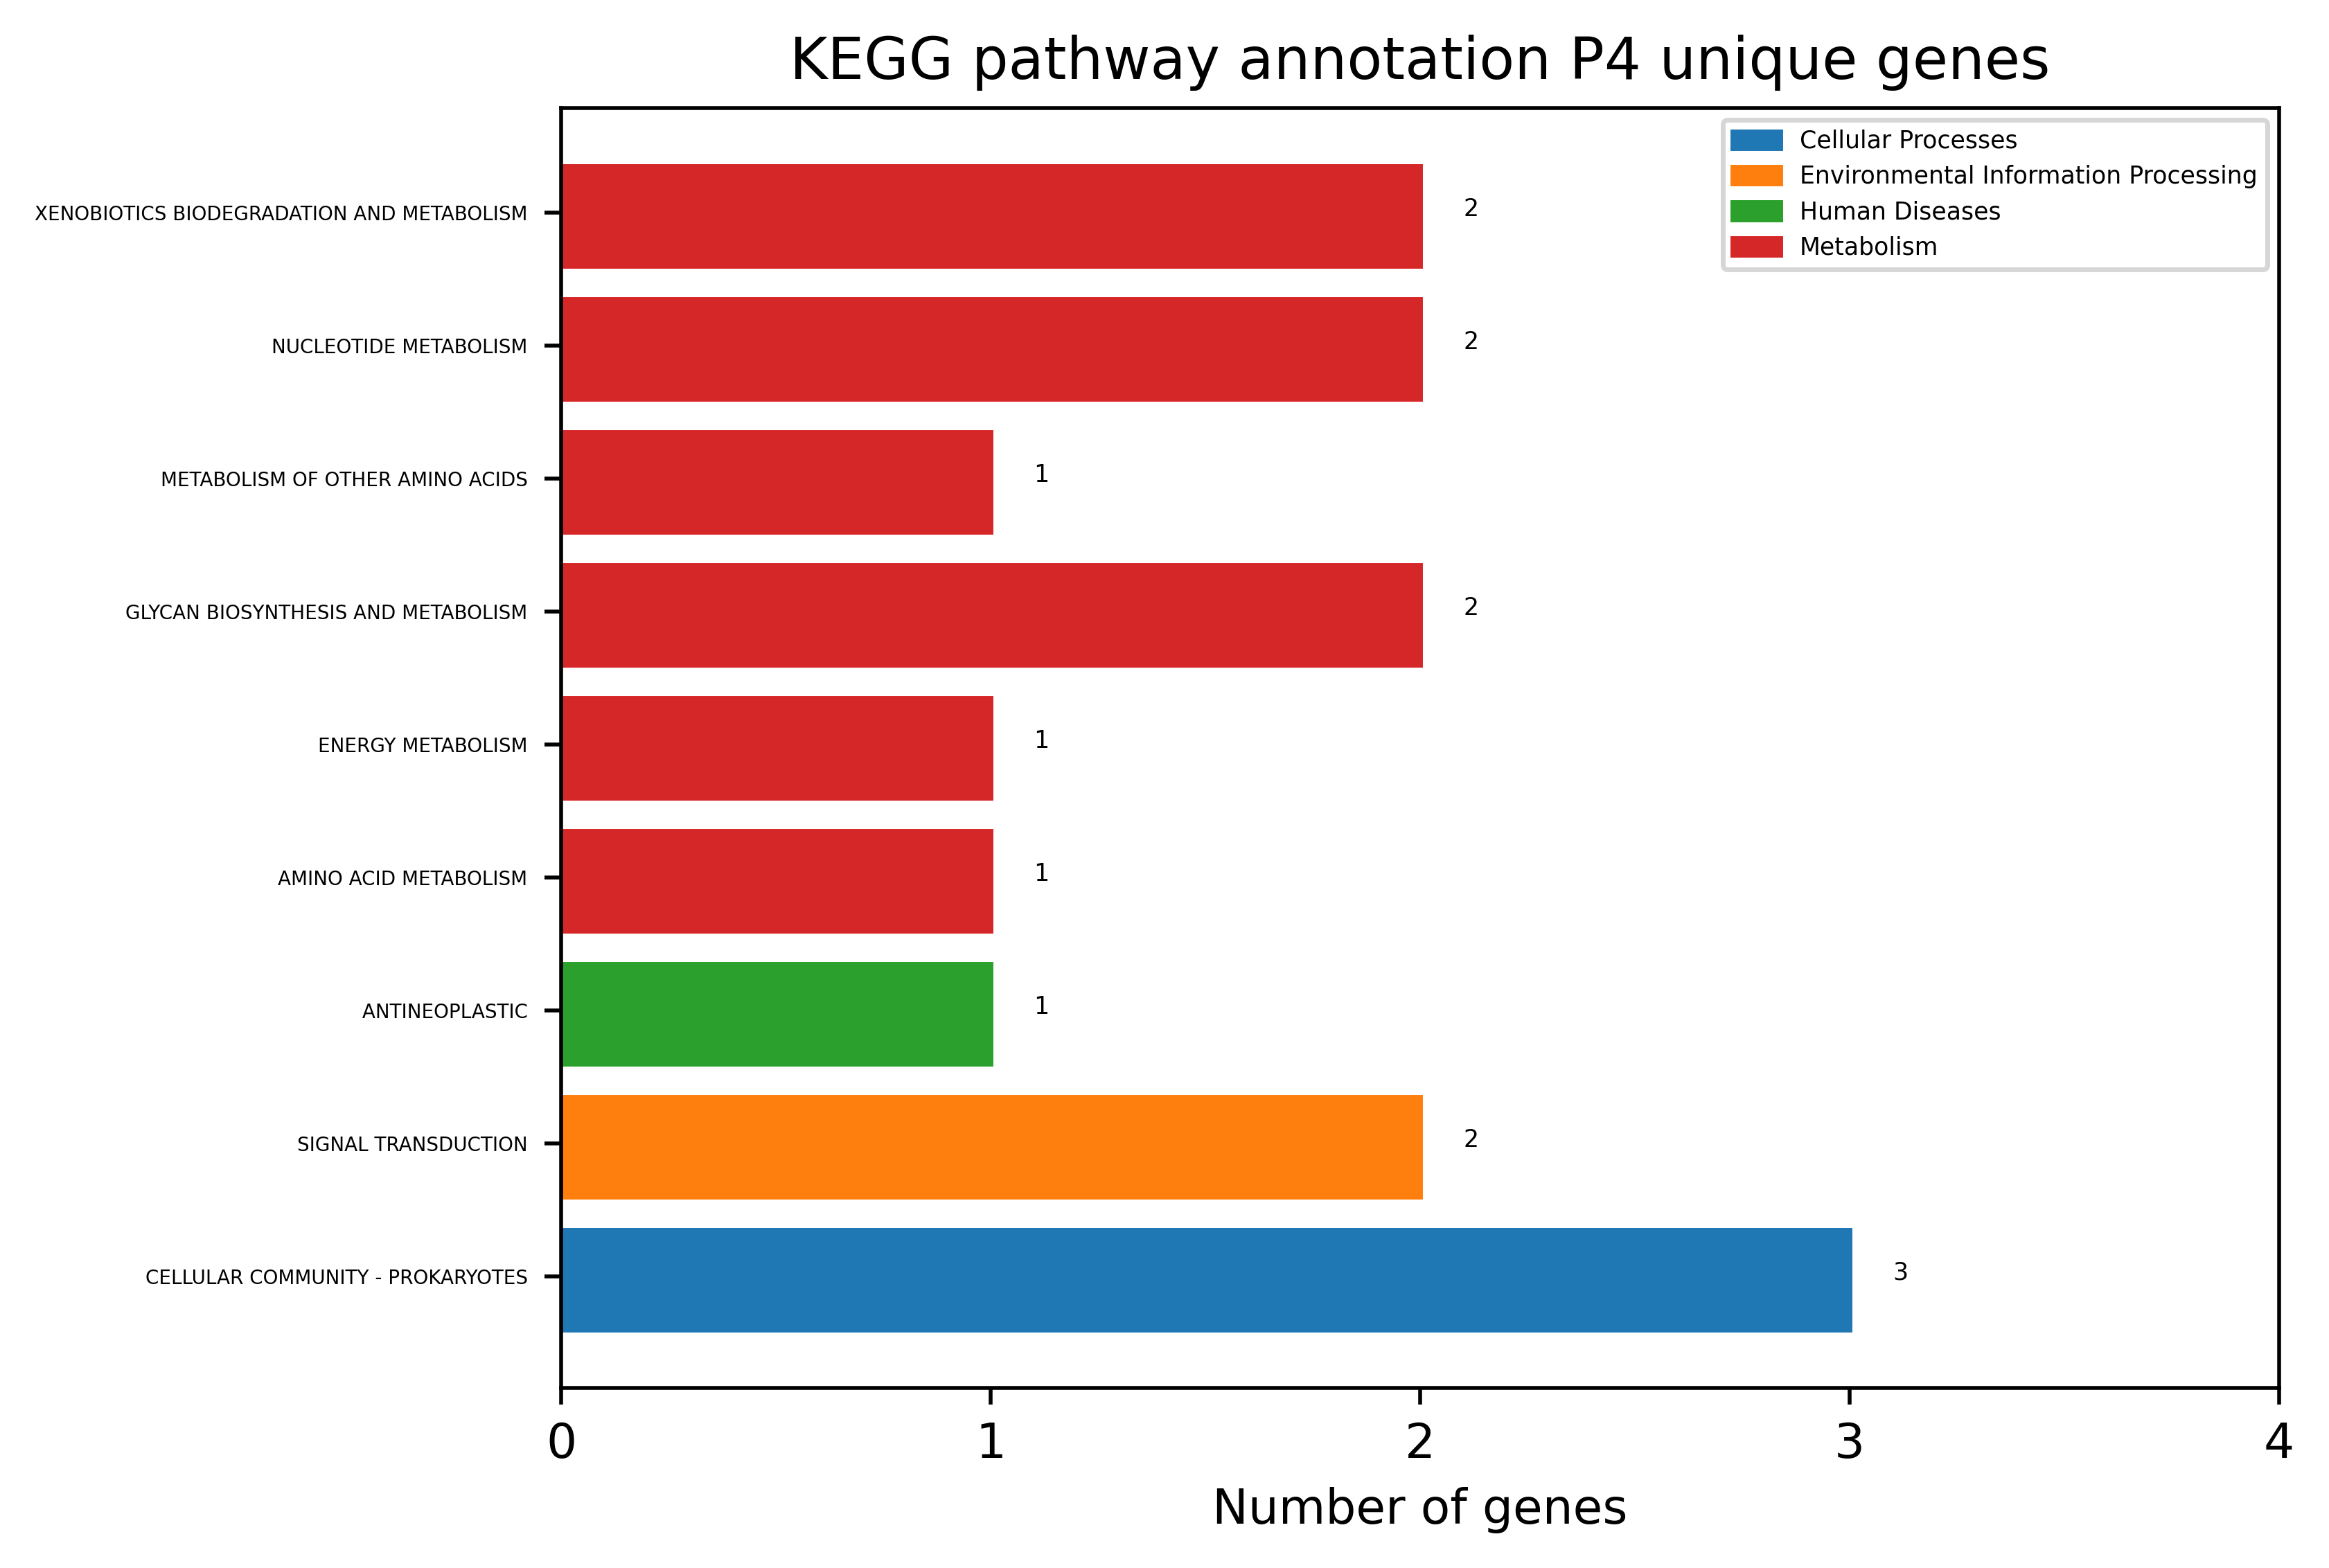

In [91]:
plot_pathway_distr(p4_distr, "P4 unique genes")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 15360x11520 with 0 Axes>

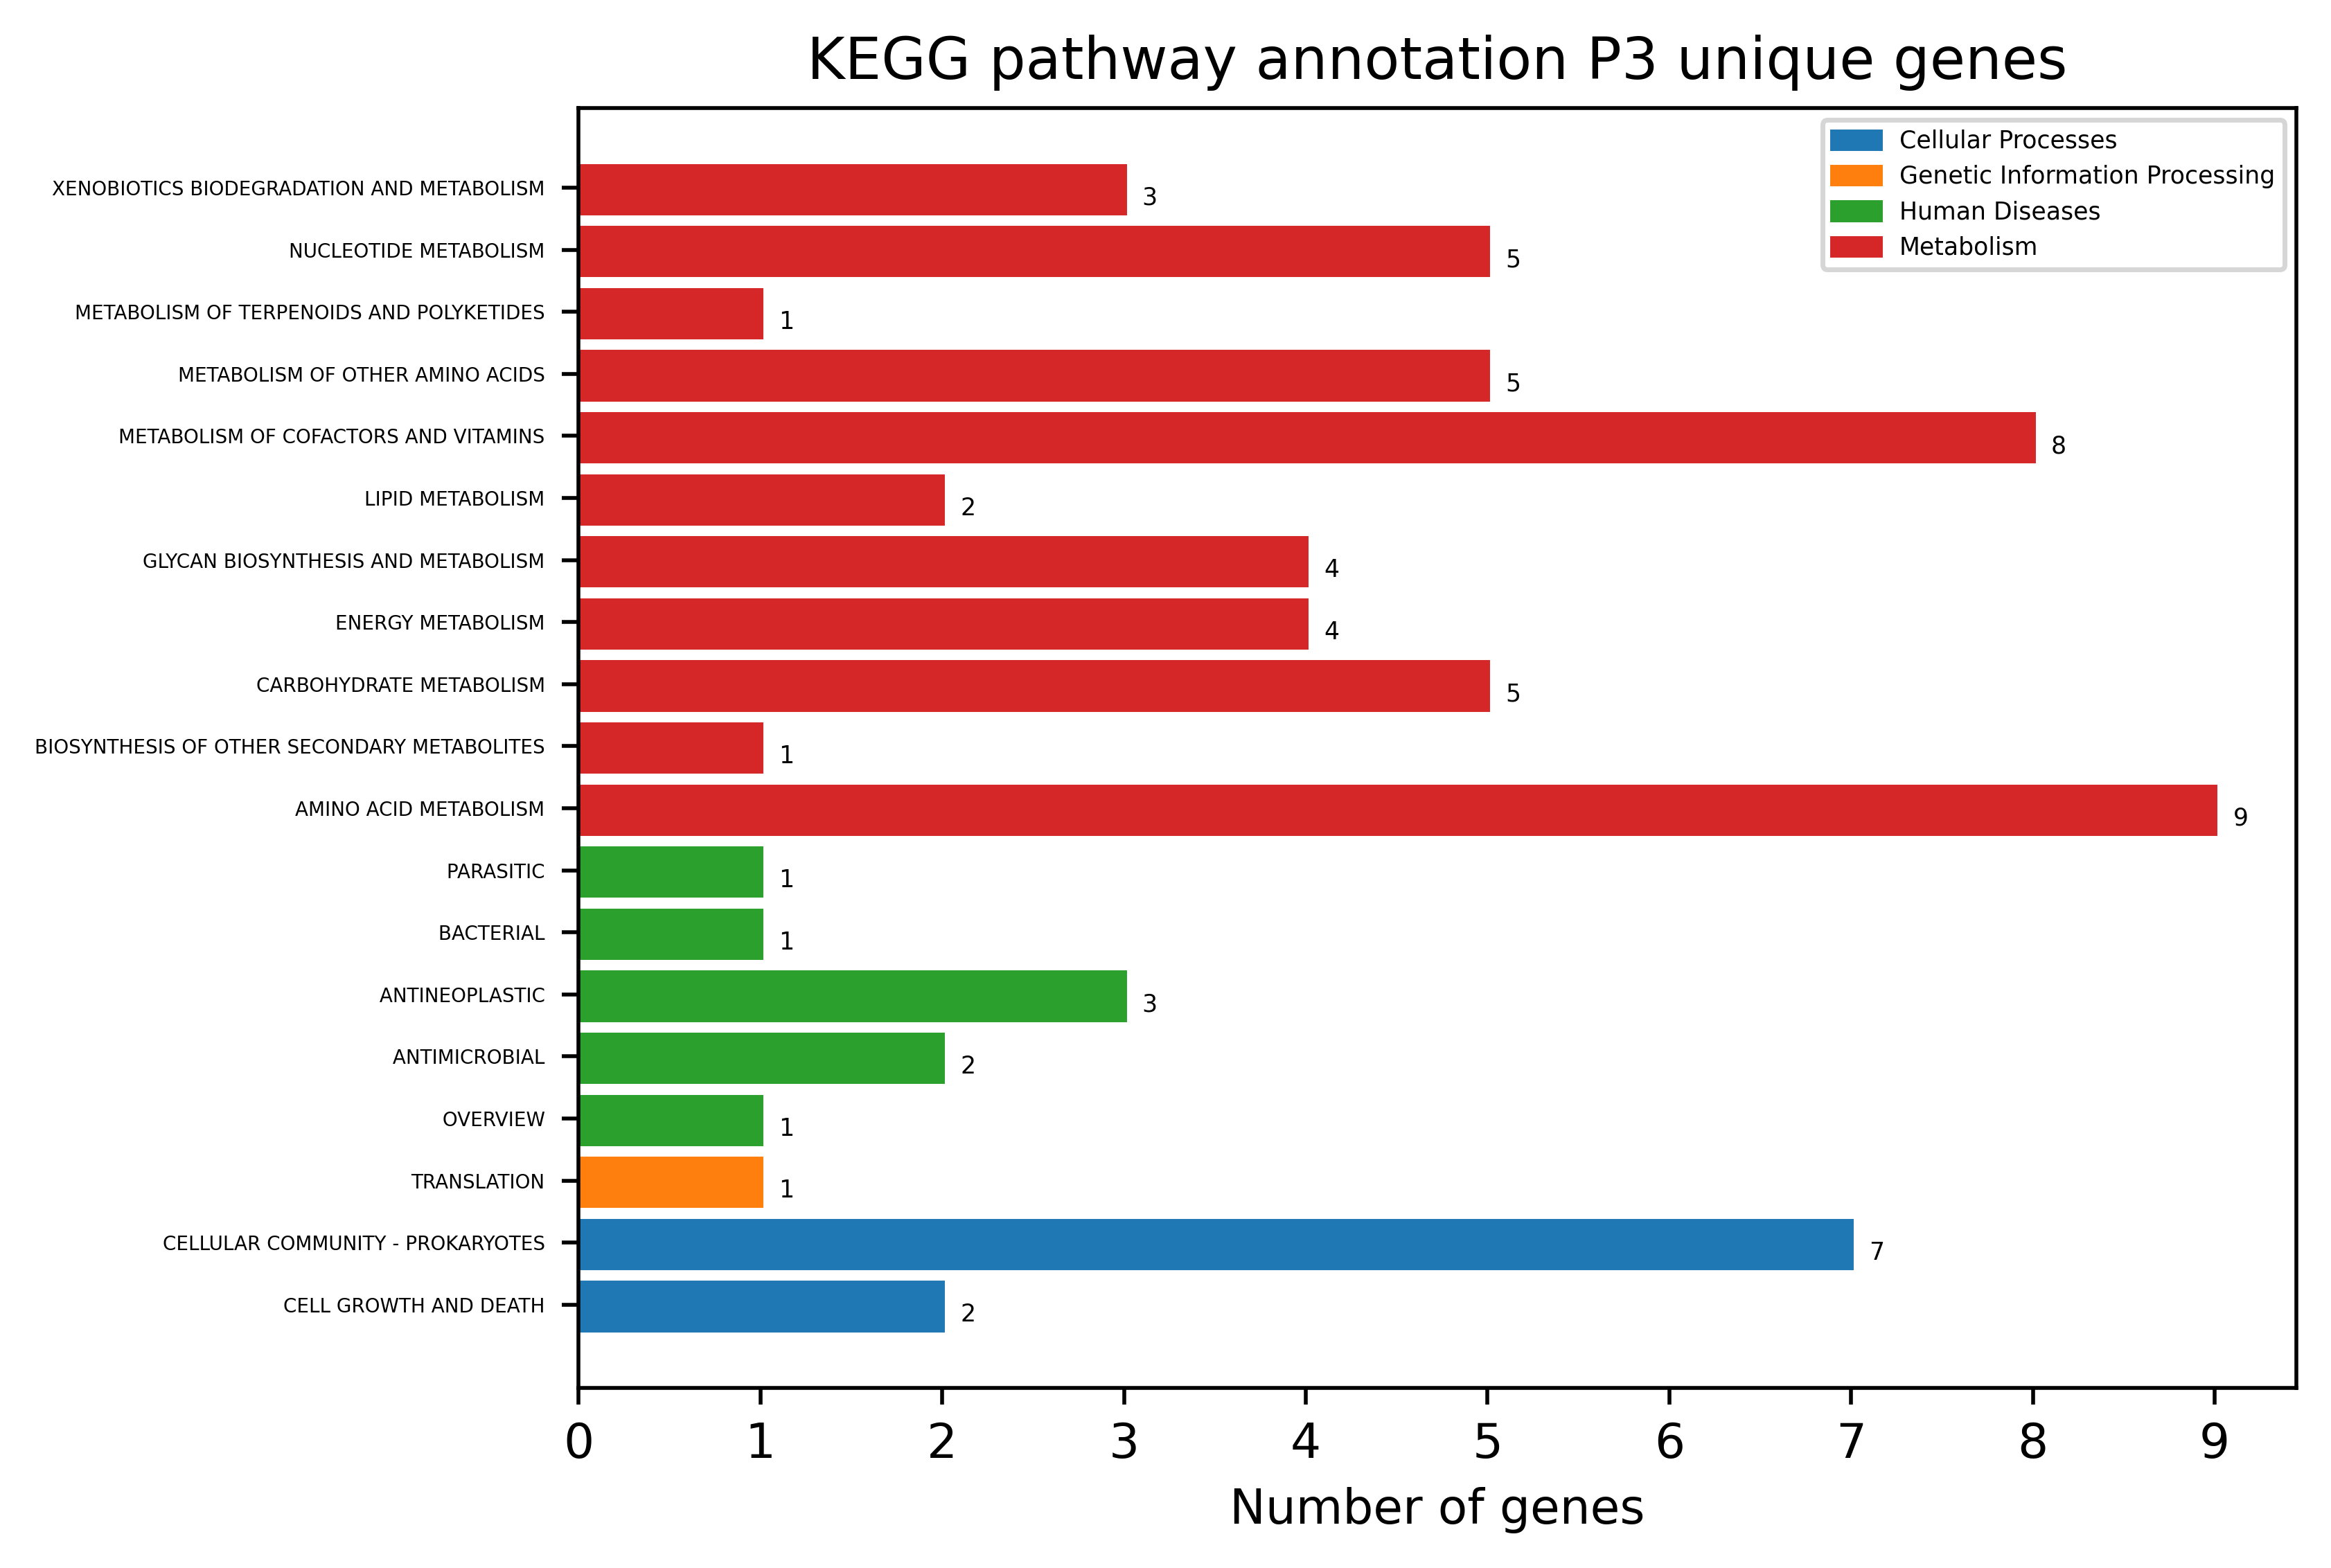

In [87]:
plot_pathway_distr(p3_distr, "P3 unique genes")